In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [34]:
class KMeans:
    def __init__(self,k):
      self.k = k

    def fit(self,x):
      
      #Random Centroids
      centroids = x[np.random.choice(x.shape[0], self.k,replace= False)]

      #Clusters's Distance From 2D-points
      distance = cdist(x, centroids ,'euclidean') 
     
      #Label Assignment to K Clusters
      label = np.array([np.argmin(i) for i in distance]) 
     
      iterations = 100
      for i in range(iterations): 
        centroids = []
        for icluster in range(self.k):
          #Updating Centroids by taking mean of Cluster it belongs to
          centroids.append(np.array(x)[label == icluster].mean(axis=0))
         
        distances = cdist(x, centroids ,'euclidean')
        label = np.array([np.argmin(i) for i in distances])
         
      return centroids,label 

[array([-3.61538462, -6.30769231]), array([-1.64705882,  4.94117647])]
[0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1]


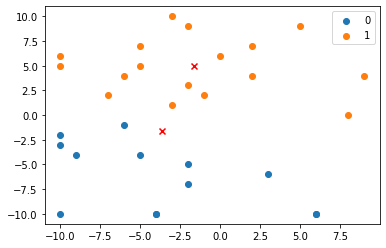

In [47]:
# x = np.array([[1,1],[2,0.5],[3,0.4],[10,15],[11.5,14],[9.4,8],[4.5,2.3],[1.3,2.3],[-4.6,6]])
x = np.random.randint(-10, 11, size=(30, 2))


km = KMeans(k = 2) 
centroids,label = km.fit(x)

print(centroids)
print(label)

# Plotting
K = len(centroids)
K_label = np.arange(K)

for i in K_label:
  plt.scatter(x[label == i, 0] , x[label == i, 1] , label = i)


plt.scatter([centroids[0][0], centroids[1][0]], [centroids[1][0], centroids[1][1]], c = 'r', marker = 'x')
plt.legend()
plt.show()


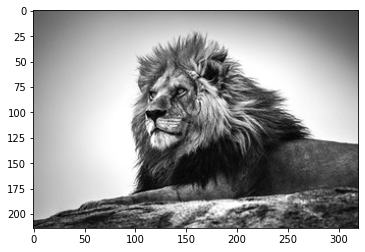

(68480, 1)


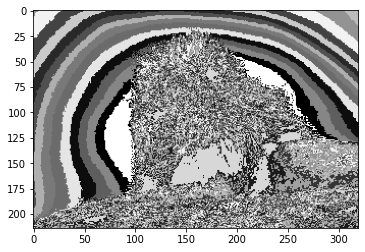

In [41]:
from PIL import Image

img = Image.open("/content/lion.jpg").convert('L')
img_arr=np.array(img)
plt.figure()
plt.imshow(img_arr,cmap='gray')
plt.show()
imgshape=img_arr.shape
img_arr =np.reshape(img_arr,(1,-1))
img_arr = np.transpose(img_arr)
print(img_arr.shape)
one_dim=np.reshape(img_arr,(img_arr.shape[0]*img_arr.shape[1],1))
one_dim = one_dim.astype('float64')


km = KMeans(k = 20)
center,lab = km.fit(one_dim)
remake=np.reshape(lab,imgshape)

plt.figure()
plt.imshow(remake,cmap='gray')
plt.show()
